# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sat_df = pd.read_csv('../data/sat.csv', index_col=0)
act_df = pd.read_csv('../data/act.csv', index_col =0)

##### 2. Print the first ten rows of each dataframe.

In [3]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


##### 3. Describe in words what each variable (column) is.

---
'State' is the state in the USA in which the rest of the row's data reflects

'Participation' is the percentage of students who took the respective exam

For the SAT, the 'Evidence-Based Reading and Writing' and 'Math' columns represent the repsective average by state scores for each section of the SAT in range (200, 800) inclussive, and 'Total' is the combined score

For the ACT, the 'English', 'Math', 'Reading', and 'Science' columns represent the respective average scores by state for each section of the ACT in range (1, 36), and 'Composite' is the average of the 4 sections

##### 4. Does the data look complete? Are there any obvious issues with the observations?

In [5]:
act_df.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [6]:
act_df[act_df.Science <10]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [7]:
sat_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
sat_df.iloc[20, :]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                        52
Total                                     1060
Name: 20, dtype: object

---
Somehow Maryland averaged 52 on Math section for the SAT.  The minimum value should only be 200. This also doesnt make sence because the reading and math combined arent equal to the total

Because there is a total column, I am going to change the Math score to be Total - Evidence-Based Reading and Writing

Also, maryland's ACT science score is impossibly low.  In the readme I found a link to the original data set where I can substitute the number found there (23.2)

In [9]:
sat_df.iloc[20, 3] = sat_df.iloc[20, 4] - sat_df.iloc[20, 2]
sat_df.iloc[20, :]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [10]:
act_df.iloc[21,5] = 23.2
act_df.iloc[21, :]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

##### 5. Print the types of each column.

In [11]:
print('SAT Types:')
print(sat_df.dtypes)
print()
print('ACT Types: ')
print(act_df.dtypes)

SAT Types:
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

ACT Types: 
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

We need to reassign Participation because it is a percentage. 

In [12]:
sat_df.Participation = sat_df.Participation.map(lambda x: float(x.replace('%', '')))

In [13]:
act_df.Participation = act_df.Participation.map(lambda x: float(x.replace('%', '')))

In [14]:
print('SAT Types:')
print(sat_df.dtypes)
print()
print('ACT Types: ')
print(act_df.dtypes)

SAT Types:
State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

ACT Types: 
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)* 

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.* **ok to skip (according to Douglas)**

##### 9. Merge the dataframes on the state column.

In [15]:
tests_df = sat_df.merge(act_df, on="State", suffixes=("_sat", "_act"))
tests_df.head()

,State,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total,Participation_act,English,Math_act,Reading,Science,Composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [16]:
name_mapping = {
    "Evidence-Based Reading and Writing":"reading_writing_sat",
    "Total":"total_sat",
    "English": "english_act",
    "Reading": "reading_act",
    "Science": "science_act",
    "Composite": "composite_act"
    
}

tests_df.rename(mapper=name_mapping,axis=1, inplace=True)

In [17]:
tests_df.head()

,State,Participation_sat,reading_writing_sat,Math_sat,total_sat,Participation_act,english_act,Math_act,reading_act,science_act,composite_act
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [18]:
tests_df.describe().T.loc[:,["min", "max"]]

,min,max
Participation_sat,2.0,100.0
reading_writing_sat,482.0,644.0
Math_sat,468.0,651.0
total_sat,950.0,1295.0
Participation_act,8.0,100.0
english_act,16.3,25.5
Math_act,18.0,25.3
reading_act,18.1,26.0
science_act,18.2,24.9
composite_act,17.8,25.5


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [19]:
def compute_std_with_list_comp(data):
    return np.sqrt((1/len(data))*sum([np.square(x-np.mean(data)) for x in data]) )

In [20]:
sd = [compute_std_with_list_comp(tests_df[col]) for col in tests_df.describe().columns]
sd

[34.92907076664508,
 45.21697020437866,
 46.65713364485503,
 91.58351056778743,
 31.824175751231806,
 2.3304876369363363,
 1.9624620273436781,
 2.0469029314842646,
 1.7222161451443676,
 2.000786081581989]

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [21]:
new_row = pd.Series(sd, tests_df.describe().columns)
sd_tests_df = tests_df.append(new_row, ignore_index=True)

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [22]:
tests_df.sort_values('Participation_sat')

,State,Participation_sat,reading_writing_sat,Math_sat,total_sat,Participation_act,english_act,Math_act,reading_act,science_act,composite_act
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,20.3
41,South Dakota,3.0,612,603,1216,80.0,20.7,21.5,22.3,22.0,21.8
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,20.5
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5
50,Wyoming,3.0,626,604,1230,100.0,19.4,19.8,20.8,20.6,20.2


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [23]:
tests_df[tests_df.total_sat >= 1200]

,State,Participation_sat,reading_writing_sat,Math_sat,total_sat,Participation_act,english_act,Math_act,reading_act,science_act,composite_act
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,21.9
16,Kansas,4.0,632,628,1260,73.0,21.1,21.3,22.3,21.7,21.7
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,20.0
23,Minnesota,3.0,644,651,1295,100.0,20.4,21.5,21.8,21.6,21.5
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,18.6
25,Missouri,3.0,640,631,1271,100.0,19.8,19.9,20.8,20.5,20.4
27,Nebraska,3.0,629,625,1253,84.0,20.9,20.9,21.9,21.5,21.4
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,20.3


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

Text(0.5,1,'SAT Participation Rate')

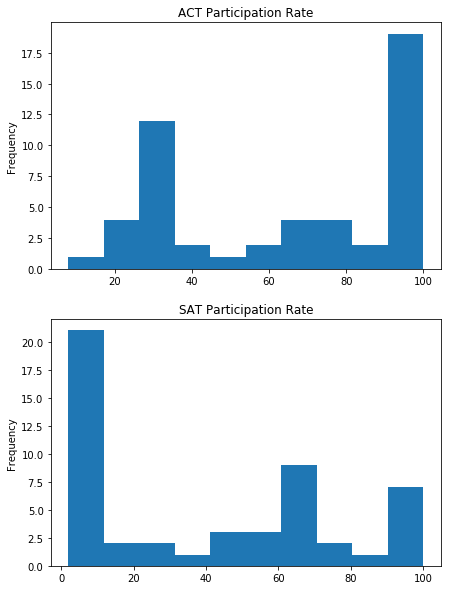

In [24]:
plt.figure(figsize=(7,10))

plt.subplot(211)
tests_df.Participation_act.plot(kind='hist')
plt.title("ACT Participation Rate")

plt.subplot(212)
tests_df.Participation_sat.plot(kind='hist')
plt.title("SAT Participation Rate")

##### 17. Plot the Math(s) distributions from both data sets.

<function matplotlib.pyplot.tight_layout>

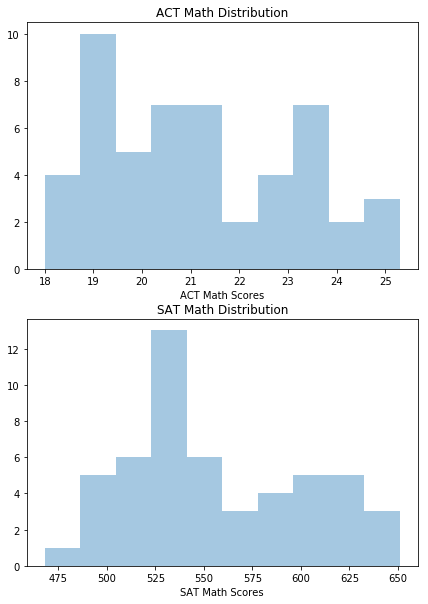

In [25]:
plt.figure(figsize=(7,10))

plt.subplot(211)
sns.distplot(tests_df.Math_act, kde=False, bins = 10)
plt.title("ACT Math Distribution")
plt.xlabel("ACT Math Scores")

plt.subplot(212)
sns.distplot(tests_df.Math_sat, kde=False, bins = 10)
plt.title("SAT Math Distribution")
plt.xlabel("SAT Math Scores")

plt.tight_layout

##### 18. Plot the Verbal distributions from both data sets.

<function matplotlib.pyplot.tight_layout>

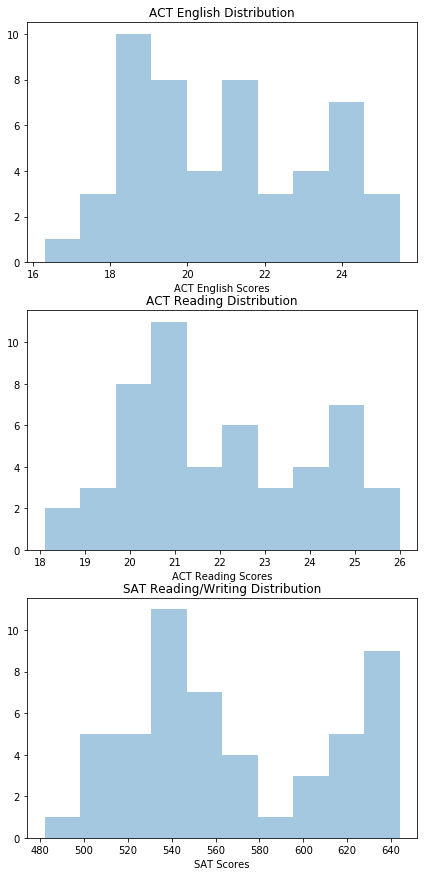

In [26]:
plt.figure(figsize=(7,15))

plt.subplot(311)
sns.distplot(tests_df.english_act, kde=False, bins = 10)
plt.title("ACT English Distribution")
plt.xlabel("ACT English Scores")

plt.subplot(312)
sns.distplot(tests_df.reading_act, kde=False, bins = 10)
plt.title("ACT Reading Distribution")
plt.xlabel("ACT Reading Scores")

plt.subplot(313)
sns.distplot(tests_df.reading_writing_sat, kde=False, bins = 10)
plt.title("SAT Reading/Writing Distribution")
plt.xlabel("SAT Scores")

plt.tight_layout

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the data follows a normal distribution centered on the mean. 

##### 20. Does this assumption hold true for any of our columns? Which?

Nope.  Most tests have 2 or 3 peaks

##### 21. Plot some scatterplots examining relationships between all variables.

In [27]:
tests_df.columns

Index(['State', 'Participation_sat', 'reading_writing_sat', 'Math_sat',
       'total_sat', 'Participation_act', 'english_act', 'Math_act',
       'reading_act', 'science_act', 'composite_act'],
      dtype='object')

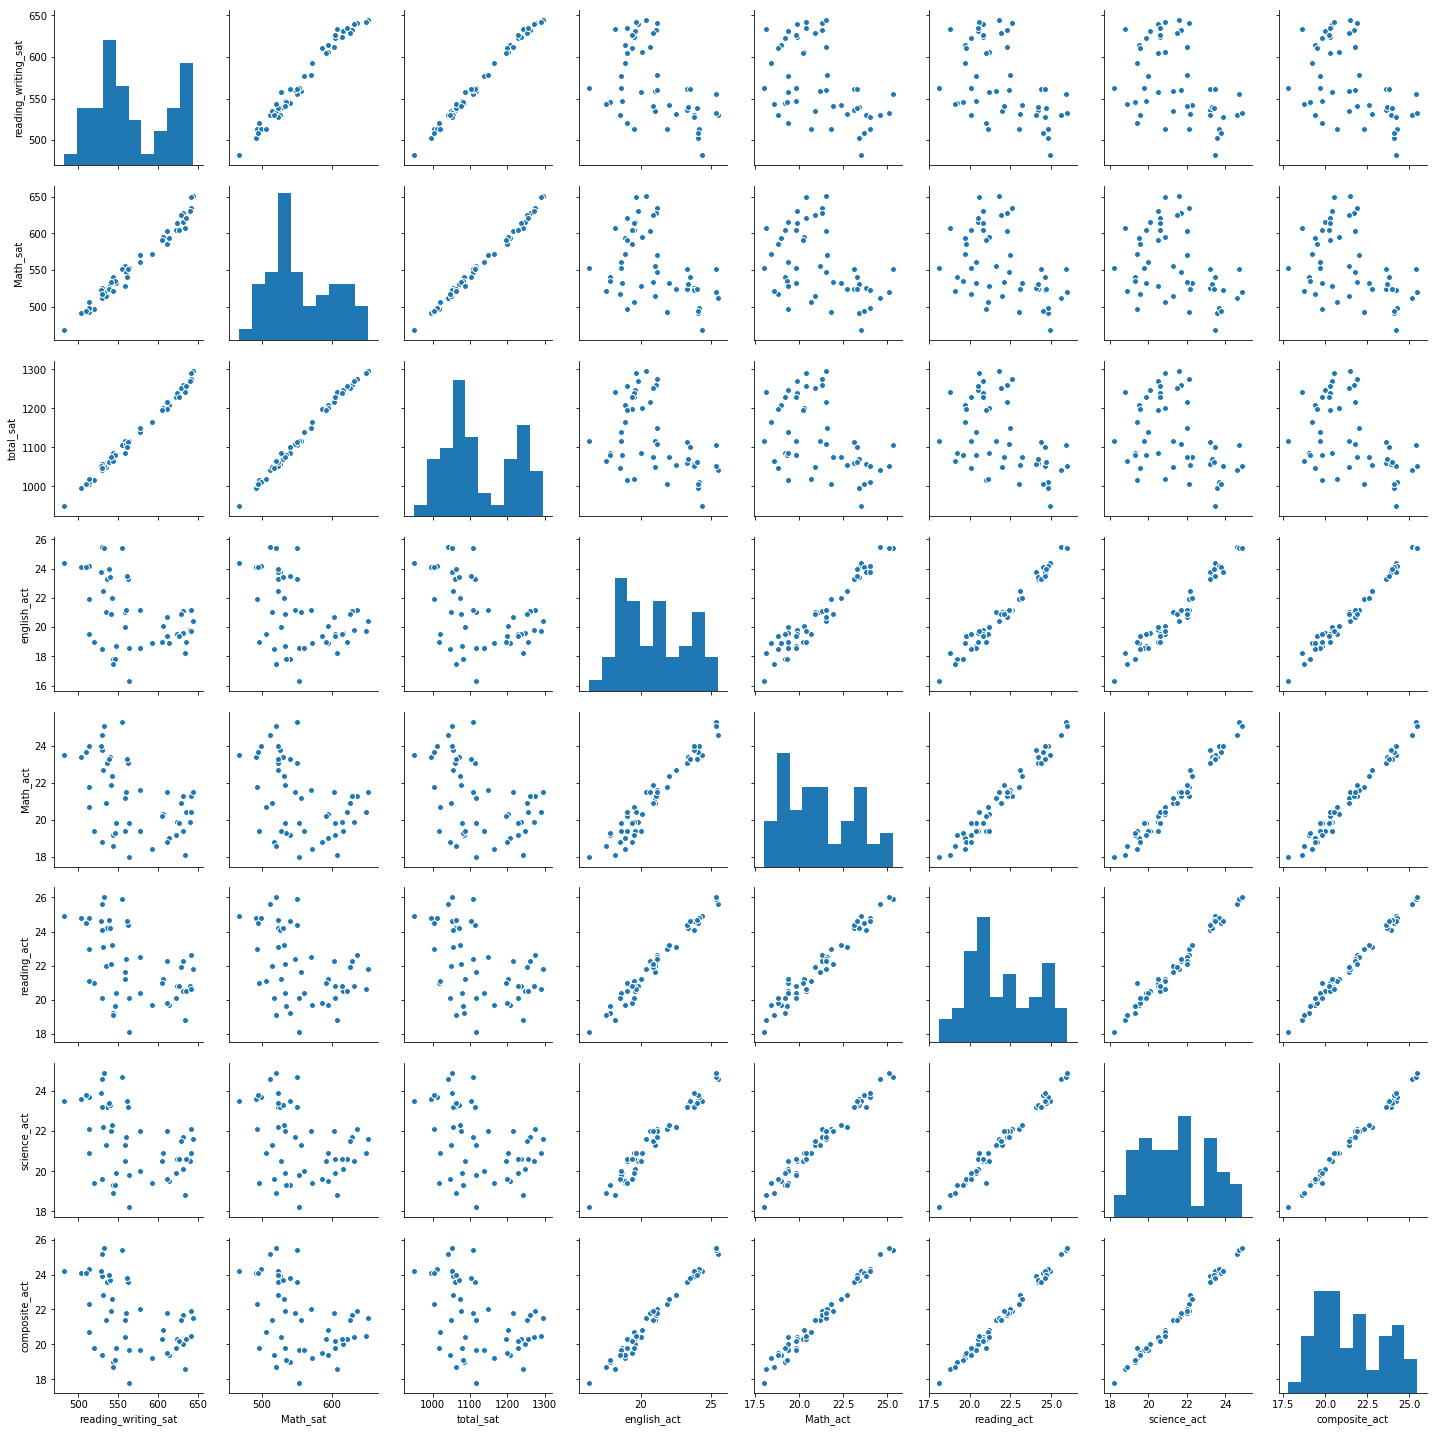

In [28]:
sns.pairplot(tests_df.loc[:,[ 'reading_writing_sat', 'Math_sat',
       'total_sat', 'english_act', 'Math_act',
       'reading_act', 'science_act', 'composite_act']])

<function matplotlib.pyplot.tight_layout>

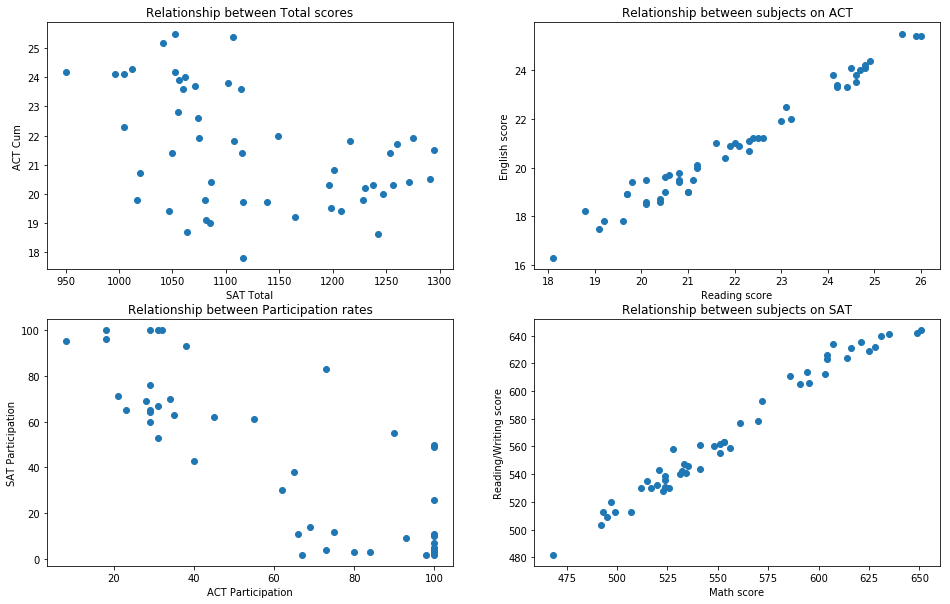

In [29]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.scatter( x = tests_df.total_sat,y = tests_df.composite_act)
plt.title("Relationship between Total scores")
plt.xlabel("SAT Total")
plt.ylabel("ACT Cum")

plt.subplot(222)
plt.scatter(x = tests_df.reading_act, y=tests_df.english_act)
plt.title("Relationship between subjects on ACT")
plt.xlabel("Reading score")
plt.ylabel("English score")

plt.subplot(223)
plt.scatter(x=tests_df.Participation_act, y = tests_df.Participation_sat)
plt.title("Relationship between Participation rates")
plt.xlabel("ACT Participation")
plt.ylabel("SAT Participation")

plt.subplot(224)
plt.scatter(x = tests_df.Math_sat, y=tests_df.reading_writing_sat)
plt.title("Relationship between subjects on SAT")
plt.xlabel("Math score")
plt.ylabel("Reading/Writing score")
plt.tight_layout

##### 22. Are there any interesting relationships to note?

Participation rates were inversely related

Within a test, scores per section had a positive relationship.  States that had higher math scores on the SAT also saw higher reading/writing scores.  States that had higher Math ACT scores saw higher reading scores and english scores. 

However, the relationship between ACT and SAT scores were not strongly corelated.  


##### 23. Create box plots for each variable. 

In [30]:
tests_df.columns

Index(['State', 'Participation_sat', 'reading_writing_sat', 'Math_sat',
       'total_sat', 'Participation_act', 'english_act', 'Math_act',
       'reading_act', 'science_act', 'composite_act'],
      dtype='object')

In [31]:
particip_data = tests_df.loc[:,['Participation_sat', 'Participation_act']]
satscores_data = tests_df.loc[:,['reading_writing_sat', 'Math_sat', 'total_sat']]
actscores_data = tests_df.loc[:,['english_act', 'Math_act', 'reading_act', 'science_act', 'composite_act']]


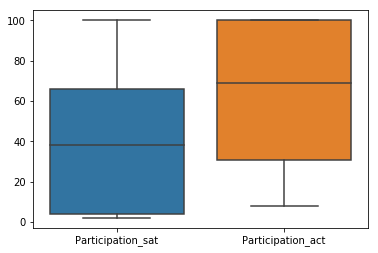

In [32]:
sns.boxplot(data = particip_data)

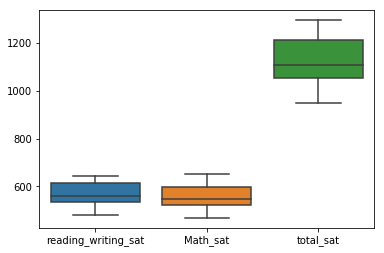

In [33]:
sns.boxplot(data=satscores_data)

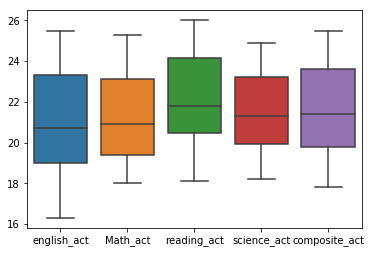

In [34]:
sns.boxplot(data=actscores_data)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

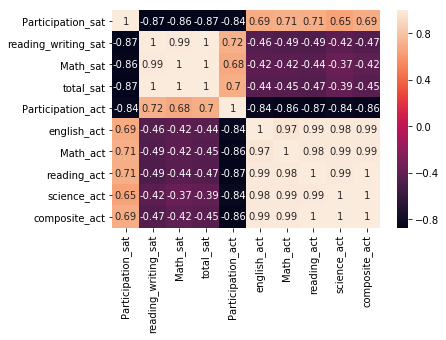

In [35]:
sns.heatmap(tests_df.corr(), annot=True)

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [36]:
tests_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation_sat,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
reading_writing_sat,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
Math_sat,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
total_sat,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
Participation_act,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
english_act,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
Math_act,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
reading_act,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
science_act,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
composite_act,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


---
We can describe each distribution by looking at population's mean and standard deviation as well as the shape of the histogram. We noticed that pretty much all the histograms had 2-3 peaks rather than the bell curve we would expect from a normal distribution.  

Looking at the histograms, it's interesting to note that the SAT scores were distributed around 2 peaks, where the ACT scores were generally distributed around 3 peaks (with the exception of science, which looked more like a bell curve with 1 bin that was pretty low).  

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

In [37]:
tests_df.corr()

,Participation_sat,reading_writing_sat,Math_sat,total_sat,Participation_act,english_act,Math_act,reading_act,science_act,composite_act
Participation_sat,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748
reading_writing_sat,-0.874326,1.000000,0.987056,0.996661,0.716153,-0.461345,-0.486126,-0.488441,-0.422130,-0.470382
Math_sat,-0.855091,0.987056,1.000000,0.996822,0.682572,-0.420673,-0.420456,-0.442410,-0.365515,-0.417817
total_sat,-0.867540,0.996661,0.996822,1.000000,0.701477,-0.441947,-0.454116,-0.466558,-0.394559,-0.445020
Participation_act,-0.841234,0.716153,0.682572,0.701477,1.000000,-0.843501,-0.861114,-0.866620,-0.836595,-0.858134
english_act,0.686889,-0.461345,-0.420673,-0.441947,-0.843501,1.000000,0.967803,0.985999,0.980042,0.990856
Math_act,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451
reading_act,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069
science_act,0.653670,-0.422130,-0.365515,-0.394559,-0.836595,0.980042,0.986929,0.988034,1.000000,0.995129
composite_act,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000


We can look at the correlation values between each variable, we notice some interesting trends. 
 * Examining the relationship between the Participation rates and the test scores, we notice a number of things:  
 
  * As we would expect, the participation rate between the two tests were inversely proportional.  This is expected because most students will only want to take 1 of the tests, so if more students in 1 state take the SAT, they will be less inclined to take the ACT.  
  
  * The interesting correlation is that SAT participation is negatively related to SAT scores, and slightly positively related to the ACT scores.  The ACT participation has a negative relationship to ACT scores, and a slight positive relationship with SAT scores.  This could be an occurence of selection bias; In states where one test is less common, those who take it are more likely to prepare for it.
  
 * As we would expect, Test scores are positively related with the scores of each of their sections, and each of the sections of a test are positively related.  States with better education tend to be better overall, and not in any specific area.
 
 * What I found interesting was that there was no significant relationship between the two tests, even if you were looking at sections testing the same areas.  One would expect that in states where students scored higher on the Math SAT, students would also score higher on the Math ACT.  
 

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [38]:
import scipy.stats as stats

Let our H0 be that the SAT's average participation rate by State is the same as that of the ACT. 

Our Alternative Hypothesis is that there is a difference between the SAT's average participation rate by state and that of the ACT.

In [39]:
print(f'Our average ACT participation rate by state is {tests_df.Participation_act.mean()}%')

print(f'Our average SAT participation rate by state is {tests_df.Participation_sat.mean()}%')

Our average ACT participation rate by state is 65.25490196078431%
Our average SAT participation rate by state is 39.80392156862745%


In [40]:
mean_dif = tests_df.Participation_sat.mean() - tests_df.Participation_act.mean()

print(f'There is a difference of {mean_dif} between the SAT\'s and the ACT\'s average participation rate' )

There is a difference of -25.450980392156858 between the SAT's and the ACT's average participation rate


In [41]:
t_stat, p_value = stats.ttest_ind(tests_df.Participation_sat, tests_df.Participation_act)
print(f'We found a T-Statistic of {t_stat} and a P-Value of {p_value}.')

We found a T-Statistic of -3.8085778908170544 and a P-Value of 0.00024134203698662353.


In [42]:
print(f'We declared our level of significance to be .05, it is {p_value < .05} that we can reject our H0')

We declared our level of significance to be .05, it is True that we can reject our H0


##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [43]:
sem_sat = tests_df.Participation_sat.std()/ np.sqrt(tests_df.Participation_sat.count())
mean_sat = tests_df.Participation_sat.mean()
sat_partic_ci = stats.norm.interval(.95, mean_sat, sem_sat )
print("We are 95% sure that the average SAT participation is in the range", sat_partic_ci)

We are 95% sure that the average SAT participation is in the range (30.122255017332662, 49.48558811992224)


In [44]:
sem_act = tests_df.Participation_act.std()/ np.sqrt(tests_df.Participation_act.count())
mean_act = tests_df.Participation_act.mean()
act_partic_ci = stats.norm.interval(.95, mean_act, sem_act)
print("We are 95% sure that the average ACT participation is in the range", act_partic_ci)

We are 95% sure that the average ACT participation is in the range (56.43385258470262, 74.075951336866)


##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

Not super surprised.  Looking at the box plot for participation, the first quartile of the ACT is close to the median of the SAT, so maybe one would expect the lower range for the ACT to be closer to the mean of the SAT, but that's still a leap. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

It is appropriate to hypothesize that there may be a correlation between the SAT and ACT math scores, as one would think that states where the students do better in the math section on one test would do better on the math section on the other test.  However, we do not see a correlation.  The falacy comes from the fact that we are indexing by state, not by student.  We know nothing about the set of students who took each test.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

We would not want to conduct statistical inference given the data we have, because as far as I believe, we have the complete data set on SAT and ACT data in 2017.  There is no trend to predict or larger population to understand.  